In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


print("Libraries imported successfully!")

Libraries imported successfully!


### Loading Data 

In [11]:
X_train = pd.read_csv('../heart_disease_data/split_data/X_train_selected.csv')
X_test = pd.read_csv('../heart_disease_data/split_data/X_test_selected.csv')
y_train = pd.read_csv('../heart_disease_data/split_data/y_train.csv')['target_binary']
y_test = pd.read_csv('../heart_disease_data/split_data/y_test.csv')['target_binary']

print("*"*40, "All Data Loaded!!!", "*"*40)

**************************************** All Data Loaded!!! ****************************************


### Training 

In [3]:
# Logistic Regression
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train, y_train)

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# SVM (Support Vector Machine)
svm = SVC(probability=True, random_state=42)  # probability=True for ROC
svm.fit(X_train, y_train)

print("All models trained!")

All models trained!


### Evaluation

In [4]:
models={
    lr: 'Logistic Regression', 
    dt :'Decision Tree', 
    rf : 'Random Forest', 
    svm: 'Support Vector Machine'
}

print(models.keys())

dict_keys([LogisticRegression(max_iter=1000, random_state=42), DecisionTreeClassifier(random_state=42), RandomForestClassifier(random_state=42), SVC(probability=True, random_state=42)])


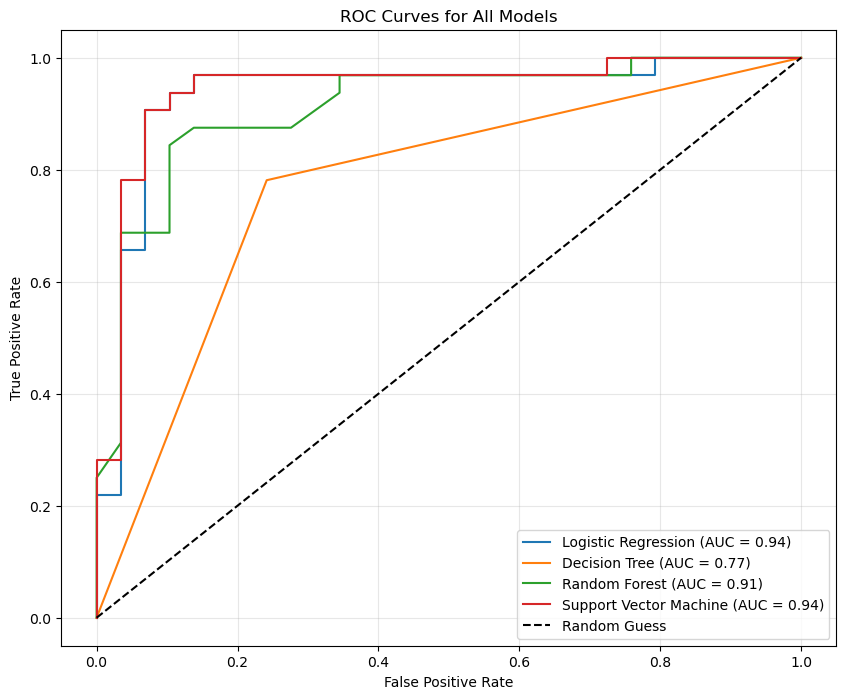

In [5]:
results=[]

plt.figure(figsize=(10, 8))


for model, model_name in models.items():

    y_pred= model.predict(X_test)
    y_prob= model.predict_proba(X_test)[:, 1]  #Extract only the second column with the probability of heart disease


    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    results.append([acc, prec, rec, f1, auc])


    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')


# Add diagonal line for random guess
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Customize plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend()  
plt.grid(True, alpha=0.3)
plt.show()


In [6]:
names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM']

results_df = pd.DataFrame(results, 
                          columns=['Accuracy', 'Precision', 'Recall', 'F1', 'AUC'],
                          index=names)

print("Model Performance Summary:")
print(results_df.round(3))

Model Performance Summary:
                     Accuracy  Precision  Recall     F1    AUC
Logistic Regression     0.902      0.906   0.906  0.906  0.935
Decision Tree           0.770      0.781   0.781  0.781  0.770
Random Forest           0.852      0.897   0.812  0.852  0.912
SVM                     0.902      0.906   0.906  0.906  0.944


### Saving results

In [12]:
output_dir = "../results/"
os.makedirs(output_dir, exist_ok=True)

# Save the results DataFrame to CSV
results_df.round(3).to_csv(os.path.join(output_dir, "model_performance_baseline.csv"))

print(f"Model performance saved to: {os.path.join(output_dir, 'model_performance_baseline.csv')}")

Model performance saved to: ../results/model_performance_baseline.csv


In [8]:
# output_dir = "./models"
# os.makedirs(output_dir, exist_ok=True)

# # Save the trained SVM model
# model_path = os.path.join(output_dir, "best_supervised_model.pkl")
# joblib.dump(svm, model_path)

# print(f"Best supervised model (SVM) saved to: {model_path}")